## Imports

In [305]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Storing all the data of the file in a variable

In [ ]:
stagri_file = 'Stagri structured data.xlsx'

## Loading blood and slaughter data

In [68]:
def load_group_data(file, name_blood, name_slh):
    df_blood = pd.read_excel(file, sheet_name=name_blood)
    df_slh = pd.read_excel(file, sheet_name=name_slh)
    df_blood['cow_id'] = df_blood['Land'] + ' ' + df_blood['Levensnr'].astype(str)
    return df_blood, df_slh

## Identifying matching calf IDs

In [69]:
def get_same_cows_ids(df_blood, df_slh):
    cow_ids_blood = set(df_blood['cow_id'])
    cow_ids_slh = set(df_slh['ID nummer'])
    return  cow_ids_blood.intersection(cow_ids_slh)

## Combining data for matching calves

In [241]:
def combine_matching_cows(df_blood, df_slh, same_cows_ids):
    # Ensure that 'cow_id' and 'ID nummer' columns are of type string
    df_blood['cow_id'] = df_blood['cow_id'].astype(str)
    df_slh['ID nummer'] = df_slh['ID nummer'].astype(str)
    
    # Filter each DataFrame based on matching cow IDs
    df_blood_filtered = df_blood[df_blood['cow_id'].isin(same_cows_ids)]
    df_slh_filtered = df_slh[df_slh['ID nummer'].isin(same_cows_ids)]
    
    # Merge the filtered DataFrames
    df_combined = pd.merge(df_blood_filtered, df_slh_filtered, left_on='cow_id', right_on='ID nummer', how='inner')
    
    return df_combined


## Loading individual treatments

In [75]:
def load_individual_treatments(file, name_individual_treatments):
    df_individual_treatments = pd.read_excel(file, sheet_name=name_individual_treatments)
    
    return df_individual_treatments

## Finding duplicated columns

In order to prepare the data to be trained and further analyzed it is needed to drop all the duplicated columns.

In [ ]:
def find_duplicate_columns(df):
    duplicates = {}
    
    for i in range(len(df.columns)):
        col1 = df.columns[i]
        for j in range(i + 1, len(df.columns)):
            col2 = df.columns[j]
            if df[col1].equals(df[col2]):
                if col1 in duplicates:
                    duplicates[col1].append(col2)
                else:
                    duplicates[col1] = [col2]
    
    return duplicates

# Stagri farm analysis
Loading and getting all the same cows from the blood sampling file and the slaughterhouse file

In [296]:
df_blood_2128334, df_slh_2128334 = load_group_data(stagri_file, name_blood='Group 2128334 - blood samples', name_slh='Group 2128334 Slaughterhouse')
df_blood_2128334['group'] = 2128334

df_blood_2203335, df_slh_2203335 = load_group_data(stagri_file, name_blood='Group 2203335 - blood samples', name_slh='Group 2203335 - Slaughterhouse')
df_blood_2203335['group'] = 2203335

df_blood_2232336, df_slh_2232336 = load_group_data(stagri_file, name_blood='Group 2232336 - blood samples', name_slh='Group 2232336 Slaughterhouse')
df_blood_2232336['group'] = 2232336

df_blood_2309337, df_slh_2309337 = load_group_data(stagri_file, name_blood='Group 2309337 - blood samples', name_slh='Group 2309337 Slaughterhouse')
df_blood_2309337['group'] = 2309337

df_blood_2338338, df_slh_2338338 = load_group_data(stagri_file, name_blood='Group 2338338 - blood samples', name_slh='Group 2338338 Slaughterhouse')
df_blood_2338338['group'] = 2338338

same_cows_2128334 = get_same_cows_ids(df_blood_2128334, df_slh_2128334)
same_cows_2203335 = get_same_cows_ids(df_blood_2203335, df_slh_2203335)
same_cows_2232336 = get_same_cows_ids(df_blood_2232336, df_slh_2232336)
same_cows_2309337 = get_same_cows_ids(df_blood_2309337, df_slh_2309337)
same_cows_2338338 = get_same_cows_ids(df_blood_2338338, df_slh_2338338)

len(same_cows_2128334)
len(same_cows_2203335)
len(same_cows_2232336)
len(same_cows_2309337)
len(same_cows_2338338)



898

Loading the individual treatment files

In [297]:
treatments_df = load_individual_treatments(stagri_file, name_individual_treatments='Individual treatments')

treatments_df.head()

,Levensnummer,Werknr,Gesl.,Haarkl.,Geboortedatum,Lft.,Lft. mnd (dgn),Moeder,Ondereindkalf,Aanv.dat.,Herkomst,Aanv. verpl.type,Afv.dat.,Bestemming,Afv. verpl.type
0,FR 5944360075,75,M,ZB,2023-09-03,201,6 (19),FR 5944359835,NaN,2023-09-20,FR,Import,2024-03-22,U2096311,Afvoer
1,FR 5944360076,76,M,ZB,2023-09-04,56,1 (26),FR 6043777289,NaN,2023-09-20,FR,Import,2023-10-30,NaN,Dood
2,FR 7634340105,105,M,ZB,2023-09-04,199,6 (17),FR 7634348996,NaN,2023-09-20,FR,Import,2024-03-21,U2096311,Afvoer
3,DE 1082700126,126,M,ZB,2023-08-06,225,7 (12),DE 1082596376,NaN,2023-09-19,DE,Import,2024-03-18,U2096311,Afvoer
4,FR 5944790164,164,M,ZB,2023-09-02,201,6 (19),FR 5944789812,NaN,2023-09-20,FR,Import,2024-03-21,U2096311,Afvoer


Combining the blood samples and the slaughterhouse sheets together and then adding them to each other to make one big file

In [298]:
combined_2128334 = combine_matching_cows(df_blood_2128334, df_slh_2128334, same_cows_2128334)
combined_2203335 = combine_matching_cows(df_blood_2203335, df_slh_2203335, same_cows_2203335)
combined_2232336 = combine_matching_cows(df_blood_2232336, df_slh_2232336, same_cows_2232336)
combined_2309337 = combine_matching_cows(df_blood_2309337, df_slh_2309337, same_cows_2309337)
combined_2338338 = combine_matching_cows(df_blood_2338338, df_slh_2338338, same_cows_2338338)

stagri_cows_combined = pd.concat([combined_2128334, combined_2203335, combined_2232336, combined_2309337, combined_2338338], ignore_index=True)

stagri_cows_combined.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Unnamed: 21,Overziener,Antibiotica,Bacteriologie,Prostaat,Spuitnek,Spuitborst,Unnamed: 8,named:21,Slacht Datum
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Merging the 'stagri_cows_combined' dataframe and checking the cows that have the same ID as the cows in the 'Individual treatment' file and assigning them value of '1' in the newly created feature 'Sick'. In the end I drop the 'cow ID - Levensummer' of the file because it is just duplicated data.

In [306]:
# I am converting to string to avoid any issues
stagri_cows_combined['cow_id'] = stagri_cows_combined['cow_id'].astype(str)
treatments_df['Levensnummer'] = treatments_df['Levensnummer'].astype(str)

final_df = pd.merge(stagri_cows_combined, treatments_df[['Levensnummer']], 
                    left_on='cow_id', right_on='Levensnummer', how='left')

final_df['Sick'] = final_df['Levensnummer'].apply(lambda x: 1 if pd.notna(x) else 0)

# I drop the 'Levensummer' column because I no longer need it
final_df.drop(columns=['Levensnummer'], inplace=True)

final_df.head(10)


,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Overziener,Antibiotica,Bacteriologie,Prostaat,Spuitnek,Spuitborst,Unnamed: 8,named:21,Slacht Datum,Sick
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,DE,1504736577,5.6,6.2,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,DE,1406467306,4.6,6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,DE,1406571204,5.0,6.7,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,DE,1406367971,6.0,6.7,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,DE,1406520014,5.3,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Deleting all the duplication columns

In [300]:
duplicate_columns = find_duplicate_columns(final_df)

for col, dupes in duplicate_columns.items():
    print(f"Column '{col}' has duplicates: {dupes}")
    
columns_to_drop = set()
for dupes in duplicate_columns.values():
    columns_to_drop.update(dupes) 

final_df = final_df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
final_df.to_excel('Final.xlsx',index=False)

Column 'HB5' has duplicates: ['S5', 'Haarkleur', 'Hoofd', 'Tong', 'Darmen', 'Long', 'Hartzwezerik', 'Keelzwezerik', 'Hart', 'Nieren', 'Lever', 'Kalf', 'Unnamed: 21', 'Overziener', 'Antibiotica', 'Bacteriologie', 'Prostaat', 'Spuitnek', 'Spuitborst', 'named:21']
Column 'S5' has duplicates: ['Haarkleur', 'Hoofd', 'Tong', 'Darmen', 'Long', 'Hartzwezerik', 'Keelzwezerik', 'Hart', 'Nieren', 'Lever', 'Kalf', 'Unnamed: 21', 'Overziener', 'Antibiotica', 'Bacteriologie', 'Prostaat', 'Spuitnek', 'Spuitborst', 'named:21']
Column 'Haarkleur' has duplicates: ['Hoofd', 'Tong', 'Darmen', 'Long', 'Hartzwezerik', 'Keelzwezerik', 'Hart', 'Nieren', 'Lever', 'Kalf', 'Unnamed: 21', 'Overziener', 'Antibiotica', 'Bacteriologie', 'Prostaat', 'Spuitnek', 'Spuitborst', 'named:21']
Column 'cow_id' has duplicates: ['ID nummer']
Column 'Hoofd' has duplicates: ['Tong', 'Darmen', 'Long', 'Hartzwezerik', 'Keelzwezerik', 'Hart', 'Nieren', 'Lever', 'Kalf', 'Unnamed: 21', 'Overziener', 'Antibiotica', 'Bacteriologie', 'P

Since in the file there are a lot of calves that are coming from a different land I am separating all the lands in a different feature to be able to have extra features and further understanding in my correlation matrix. E.g. Maybe all sick calves actually are french so this could lead to further analysis.

Same goes for the 'group' feature. I have combined 5 groups in this file and I want to indicate in which group the calf was. This was created again for possible further analysis in the future.

In [1]:
# Creating a unique value in the group column, 'prefix-group' adds the unique values after the group
one_hot_encoding = pd.get_dummies(final_df['group'], prefix='group')

#Concatenates the new column to the final_df
final_df = pd.concat([final_df, one_hot_encoding], axis=1)

# After that we drop the original one
final_df.drop('group', axis=1, inplace=True)

one_hot_encoding = pd.get_dummies(final_df['Land'], prefix='land')
final_df = pd.concat([final_df, one_hot_encoding], axis=1)
final_df.drop('Land', axis=1, inplace=True)

final_df.columns

NameError: name 'pd' is not defined

Columns that will be used to correlate to sickness

In [302]:
stagri_cows = final_df[['HB1', 'HB2', 'HB3', 'S2', 'S3', 'group_2338338', 'group_2128334','group_2232336','group_2309337','land_DE','land_FR','land_NL', 'land_LU','Gewicht', 'Sick']]

Creating the heatmap

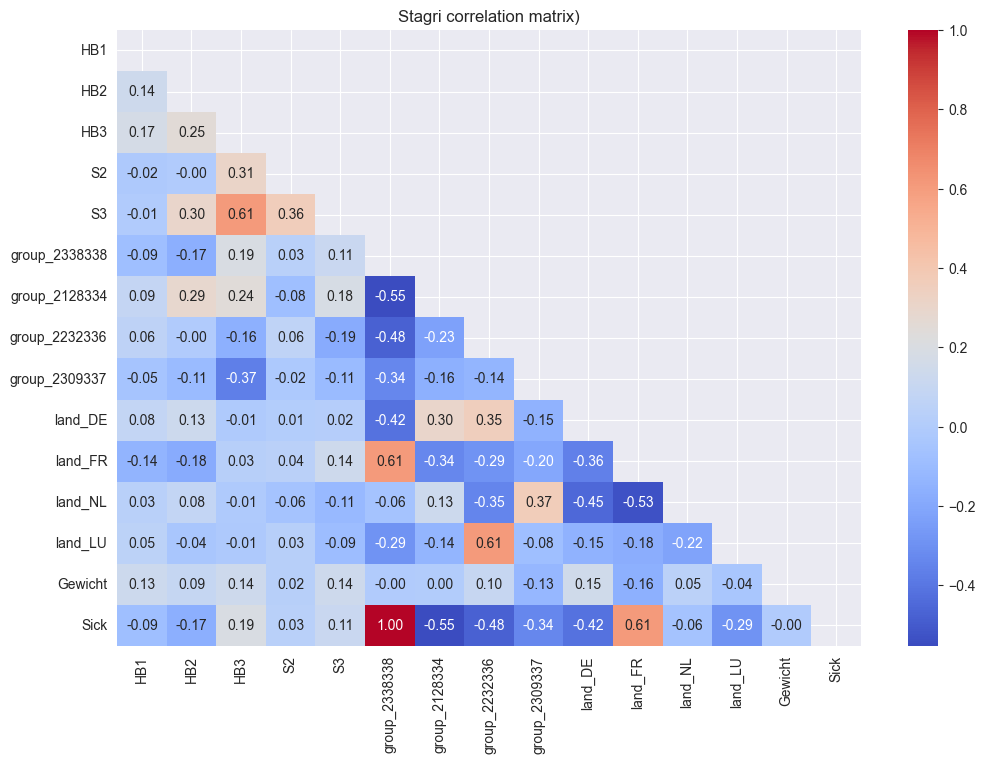

In [309]:
stagri_corr = stagri_cows.corr()

mask = np.triu(np.ones_like(stagri_corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(stagri_corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Stagri correlation matrix)")
plt.show()

### Slaughterhouse (S)

In [104]:
df_blood_2128334, df_slh_2128334 = load_group_data(
    stagri_file, name_blood='Group 2128334 - blood samples',
    name_slh='Group 2128334 Slaughterhouse',
)

In [98]:
same_cows_2128334 = get_same_cows_ids(df_blood_2128334, df_slh_2128334)

def load_blood_sample_sheet(file, name_blood):
    df_blood_samples = pd.read_excel(file, sheet_name=name_blood)
    return df_blood_samples


def load_slaughterhouse_sheet(file, slh_blood):
    df_blood_samples = pd.read_excel(file, sheet_name=slh_blood)
    return df_blood_samples

df_blood_2128334 = load_blood_sample_sheet("Stagri structured data.xlsx", name_blood='Group 2128334 - blood samples')

df_slh_2128334 = load_slaughterhouse_sheet("Stagri structured data.xlsx", slh_blood='Group 2128334 Slaughterhouse')

print("Amount of the blood sample data")
len(df_blood_2128334)
print("------------")

print("Amount of the slaughterhouse data")
len(df_slh_2128334)
print("-----------")

print("The amount of identical calves in both datasets")
len(same_cows_2128334)

Amount of the blood sample data
------------
Amount of the slaughterhouse data
-----------
The amount of identical calves in both datasets


354

In [237]:
df_combined_2128334 = combine_matching_cows(df_blood_2128334,df_slh_2128334, same_cows_2128334)

df_combined_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Nieren,Lever,Kalf,Unnamed: 21,Overziener,Antibiotica,Bacteriologie,Prostaat,Spuitnek,Spuitborst
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df_stallijst_2128334 = load_stallijst_data(stagri_file, name_stallijst='Group 2128334 - Stallijst')

df_stallijst_2128334.head()

df_final_combined_2128334 = combine_stallijst(df_combined_2128334, df_stallijst_2128334)

df_final_combined_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Calf ID,Calf ID + Country,Country ID,Birth date,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,1.406468e+09,DE1406468164,DE,2021-06-08,lochimex,V,U,Eenkleurig bruin,2021-07-14,42.0
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,1.269785e+09,DE1269784656,DE,2021-06-26,lochimex,S,Z,Zwartbont,2021-07-14,51.0
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,1.269785e+09,DE1269784653,DE,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,51.0
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,1.269785e+09,DE1269784654,DE,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,49.0
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,1.406365e+09,DE1406364716,DE,2021-06-29,lochimex,V,Z,Zwartbont,2021-07-14,47.0


In [111]:
df_arrival_weights = load_arrival_weights(stagri_file, name_arrival_weights='Arrival weights'
)

df_final_with_weights = add_arrival_weight(df_final_combined_2128334, df_arrival_weights)

df_final_with_weights.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Handelaar,Arrival date,Arrival weight
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,lochimex,2021-07-14,46.0
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,S,Z,Zwartbont,2021-07-14,49.0,Stagri,lochimex,2021-07-14,46.0
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,lochimex,V,Z,Zwartbont,2021-07-14,47.0,Stagri,lochimex,2021-07-14,46.0


In [160]:
df_individual_treatments = load_individual_treatments(stagri_file, name_individual_treatments='Individual treatments')

df_final_with_sickness_2128334 = add_sick_status(df_final_with_weights, df_individual_treatments)

df_final_with_sickness_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,HB4,HB5,S2,S3,S4,...,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Handelaar,Arrival date,Arrival weight,Sick
0,DE,1406468164,6.5,7.1,NaN,NaN,NaN,0.0,NaN,NaN,...,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,lochimex,2021-07-14,46.0,no
1,DE,1269784656,6.7,6.6,NaN,NaN,NaN,0.0,NaN,NaN,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
2,DE,1269784653,6.3,6.8,NaN,NaN,NaN,0.0,NaN,NaN,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
3,DE,1269784654,6.6,7,NaN,NaN,NaN,0.0,NaN,NaN,...,S,Z,Zwartbont,2021-07-14,49.0,Stagri,lochimex,2021-07-14,46.0,no
4,DE,1406364716,7.0,6.9,NaN,NaN,NaN,0.0,NaN,NaN,...,V,Z,Zwartbont,2021-07-14,47.0,Stagri,lochimex,2021-07-14,46.0,no


In [161]:
df_cleaned_2128334 = df_final_with_sickness_2128334.dropna(axis=1, how='all')

df_cleaned_2128334.head()

,Land,Levensnr,HB1,HB2,HB3,S2,S3,cow_id,ID nummer,WerkNr,...,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Handelaar,Arrival date,Arrival weight,Sick
0,DE,1406468164,6.5,7.1,NaN,0.0,NaN,DE 1406468164,DE 1406468164,68164,...,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,lochimex,2021-07-14,46.0,no
1,DE,1269784656,6.7,6.6,NaN,0.0,NaN,DE 1269784656,DE 1269784656,84656,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
2,DE,1269784653,6.3,6.8,NaN,0.0,NaN,DE 1269784653,DE 1269784653,84653,...,S,Z,Zwartbont,2021-07-14,51.0,Stagri,lochimex,2021-07-14,46.0,no
3,DE,1269784654,6.6,7,NaN,0.0,NaN,DE 1269784654,DE 1269784654,84654,...,S,Z,Zwartbont,2021-07-14,49.0,Stagri,lochimex,2021-07-14,46.0,no
4,DE,1406364716,7.0,6.9,NaN,0.0,NaN,DE 1406364716,DE 1406364716,64716,...,V,Z,Zwartbont,2021-07-14,47.0,Stagri,lochimex,2021-07-14,46.0,no


In [162]:
matching_columns = []

columns = df_cleaned_2128334.columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        if df_cleaned_2128334[col1].equals(df_cleaned_2128334[col2]):
            matching_columns.append((col1, col2))

print(f"Total matching columns: {len(matching_columns)}")
for col1, col2 in matching_columns:
    print(f"{col1} matches {col2}")

Total matching columns: 4
Land matches Country ID
cow_id matches ID nummer
Merchant matches Handelaar
Arrival Date at Veal Farm matches Arrival date


In [163]:
columns_to_drop = ['Arrival date', 'Handelaar', 'ID nummer', 'cow_id', 'Levensnr', 'Land']
df_final_cleaned_2128334 = df_cleaned_2128334.drop(columns=columns_to_drop)

df_final_cleaned_2128334.head()

,HB1,HB2,HB3,S2,S3,WerkNr,#,Gewicht,Soort,Kleur,...,Birth date,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Arrival weight,Sick
0,6.5,7.1,NaN,0.0,NaN,68164,1581,90.40,14,10,...,2021-06-08,lochimex,V,U,Eenkleurig bruin,2021-07-14,42.0,Stagri,46.0,no
1,6.7,6.6,NaN,0.0,NaN,84656,275,165.44,11,6,...,2021-06-26,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,46.0,no
2,6.3,6.8,NaN,0.0,NaN,84653,249,161.33,11,7,...,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,51.0,Stagri,46.0,no
3,6.6,7,NaN,0.0,NaN,84654,278,138.79,11,5,...,2021-06-25,lochimex,S,Z,Zwartbont,2021-07-14,49.0,Stagri,46.0,no
4,7.0,6.9,NaN,0.0,NaN,64716,720,135.26,12,5,...,2021-06-29,lochimex,V,Z,Zwartbont,2021-07-14,47.0,Stagri,46.0,no


In [178]:
df_final_cleaned_2128334['HB2'] = df_final_cleaned_2128334['HB2'].fillna(0)
df_final_cleaned_2128334['HB3'] = df_final_cleaned_2128334['HB3'].fillna(0)
df_final_cleaned_2128334['S2'] = df_final_cleaned_2128334['S2'].fillna(0)
df_final_cleaned_2128334['S3'] = df_final_cleaned_2128334['S3'].fillna(0)

df_final_cleaned_2128334['Sex'] = df_final_cleaned_2128334['Sex'].map({'S' : 1, 'V' : 0}).astype(int)

df_final_cleaned_2128334.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [181]:
df_final_cleaned_2128334['Fur color'] = pd.factorize(df_final_cleaned_2128334['Fur color'])[0]
df_final_cleaned_2128334['Merchant'] = pd.factorize(df_final_cleaned_2128334['Merchant'])[0]

df_final_cleaned_2128334.head()
# 
# print(df_final_cleaned_2128334[['Fur color', 'Merchant', 'Sex']].head(5))

,HB1,HB2,HB3,S2,S3,WerkNr,#,Gewicht,Soort,Kleur,...,Birth date,Merchant,Sex,Color Letter,Fur color,Arrival Date at Veal Farm,Days at diary farm,Stable,Arrival weight,Sick
0,6.5,7.1,0.0,0.0,0.0,68164,1581,90.40,14,10,...,2021-06-08,0,0,U,0,2021-07-14,42.0,Stagri,46.0,no
1,6.7,6.6,0.0,0.0,0.0,84656,275,165.44,11,6,...,2021-06-26,0,1,Z,1,2021-07-14,51.0,Stagri,46.0,no
2,6.3,6.8,0.0,0.0,0.0,84653,249,161.33,11,7,...,2021-06-25,0,1,Z,1,2021-07-14,51.0,Stagri,46.0,no
3,6.6,7.0,0.0,0.0,0.0,84654,278,138.79,11,5,...,2021-06-25,0,1,Z,1,2021-07-14,49.0,Stagri,46.0,no
4,7.0,6.9,0.0,0.0,0.0,64716,720,135.26,12,5,...,2021-06-29,0,0,Z,1,2021-07-14,47.0,Stagri,46.0,no


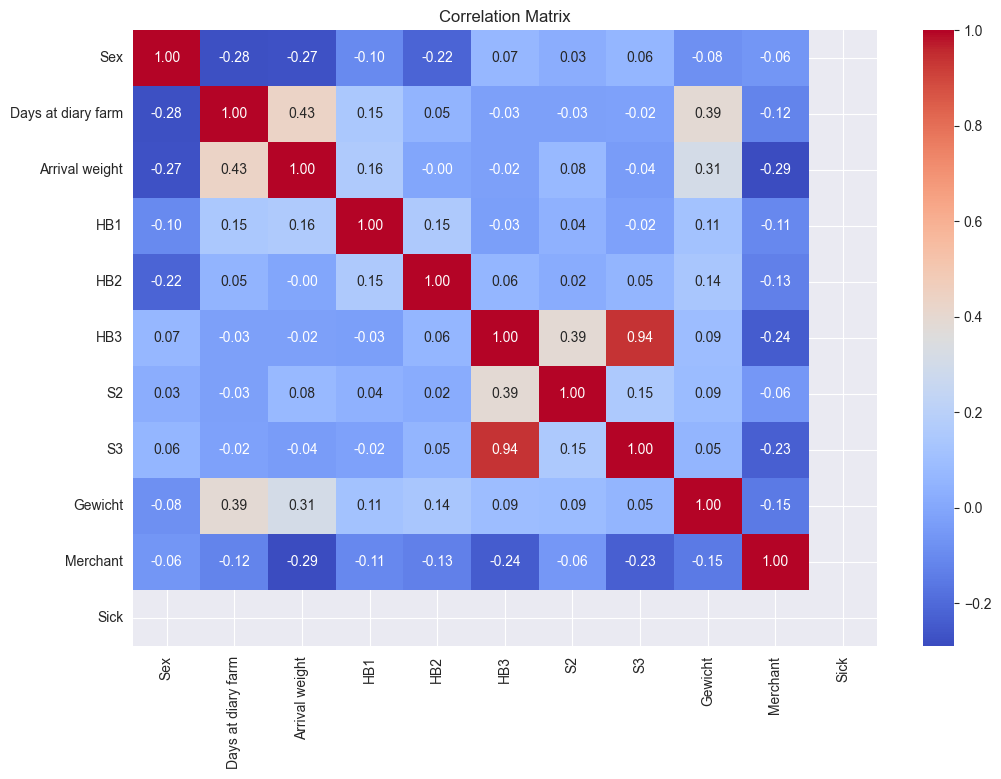

In [182]:
df_final_cleaned_2128334['Sick'] = df_final_cleaned_2128334['Sick'].map({'yes': 1, 'no': 0})


numeric_df = df_final_cleaned_2128334[['Sex', 'Days at diary farm', 'Arrival weight', 'HB1', 'HB2', 'HB3', 'S2', 'S3', 'Gewicht', 'Merchant','Sick']]

correlation = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', cbar = True)
plt.title('Correlation Matrix')
plt.show()

### Pali Slaughterhouse

In [192]:
df_blood_2128334, df_slh_2128334 = load_group_data(stagri_file, name_blood='Group 2128334 - blood samples', name_slh='Group 2128334 - SlaughterhouseP')

same_cows_2128334 = get_same_cows_ids(df_blood_2128334, df_slh_2128334)

len(same_cows_2128334)

130

In [194]:
df_combined_2128334 = combine_matching_cows(df_blood_2128334,df_slh_2128334 ,same_cows_2128334)

df_stallijst_2128334 = load_stallijst_data(stagri_file, name_stallijst='Group 2128334 - Stallijst')

df_combined_with_stallijst_2128334 = combine_stallijst(df_combined_2128334, df_stallijst_2128334)

df_combined_with_stallijst_2128334.head()

130

In [197]:
df_arrival_weights = load_arrival_weights(stagri_file, name_arrival_weights='Arrival weights')

df_final_combined_212833 = add_arrival_weight(df_combined_with_stallijst_2128334, df_arrival_weights)

df_final_combined_2128334.head()

354

The result is 354 because there are duplicates from adding the arrival weights file to the df_final_combined_2128334

In [201]:
df_individual_treatments = load_individual_treatments(stagri_file, name_individual_treatments='Individual treatments')

df_final_with_sickness_2128334 = add_sick_status(df_final_combined_2128334, df_individual_treatments)

df_final_with_sickness_2128334.head()

## Group 2203335

### Slaughterhouse (S)

## Group 2232336

### Slaughterhouse (S)

### Pali Slaughterhouse

## Group 2309337

### Slaughterhouse (S)

## Group 2338338

### Slaughterhouse (S)